<a href="https://colab.research.google.com/github/Caromponce/ProyectosDataPython-UNER/blob/main/Guia2_TP_03_Grafos_aplicados_PonceCarolina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

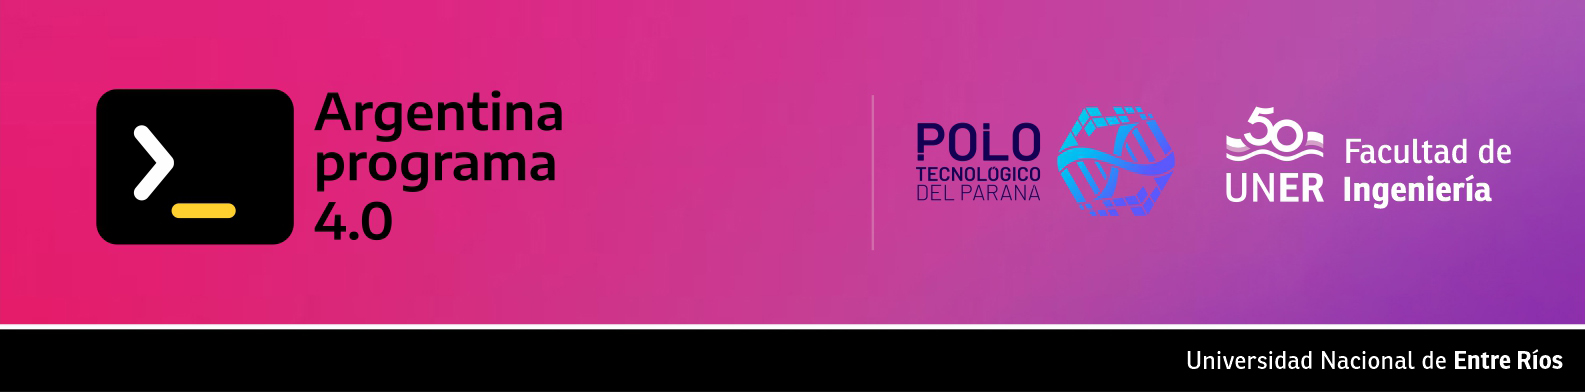

 # Guía Práctica N° 3: Grafos aplicados a ciencia de datos




---





## Objetivos
----



* Aprender qué son los grafos, sus clasificaciones y cómo pueden emplearse para plantear la solución a problemas de ciencia de datos.
* Aplicar algoritmos de búsqueda de caminos óptimos con la ayuda de grafos.
* Encontrar componentes fuertemente conexas en colecciones de datos.
* Conocer algoritmos de optimización de redes para encontrar árboles de expansión de costo mínimo.
* Aplicar herramientas para manejar y visualizar grafos.

# Ejercicios y Problemas ✍ 🤓


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns

## 1) Ejercicio de práctica
Generar un grafo dirigido de 5 nodos que responden al siguiente comportamiento:

'Lautaro' y 'Melisa' siguen a 'Alejandro', 'Marina' y 'Gimena'.

 'Marina' sigue a 'Melisa', 'Lautaro' y 'Alejandro'.

 'Alejandro' y 'Gimena' se siguen mutuamente.


Gráficar de modo circular y verificar las correspondencias.


In [ ]:
# Creación del grafo clase
grafo_clase = nx.DiGraph()

In [ ]:
# Creación de nodos
grafo_clase.add_nodes_from(['Lautaro', 'Melisa', 'Alejandro', 'Marina', 'Gimena'])

In [ ]:
# Creación de aristas
grafo_clase.add_edges_from([('Lautaro', 'Alejandro'), ('Lautaro', 'Marina'), ('Lautaro', 'Gimena')])
grafo_clase.add_edges_from([('Melisa', 'Alejandro'), ('Melisa', 'Marina'), ('Melisa', 'Gimena')])
grafo_clase.add_edges_from([('Marina','Melisa'),('Marina','Lautaro'),('Marina','Alejandro')])
grafo_clase.add_edges_from([('Alejandro','Gimena'),('Gimena','Alejandro')])

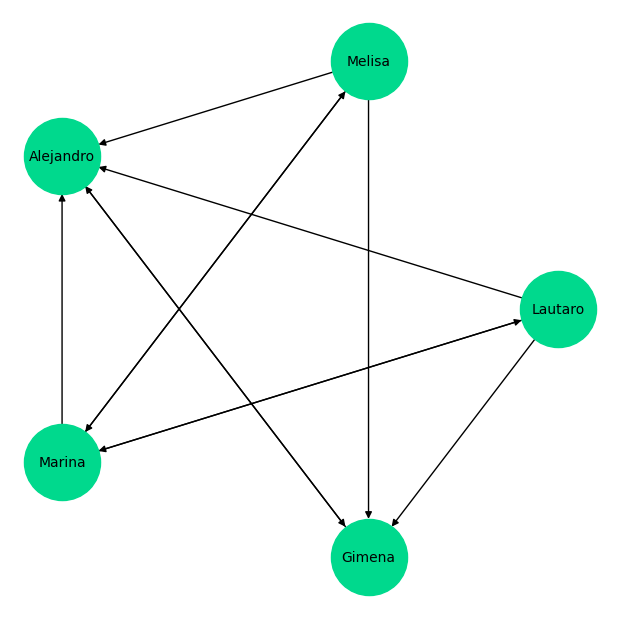

In [ ]:
# Gráfico
plt.figure(figsize=(6,6))
nx.draw_circular(grafo_clase,
                 node_color='#00d98d',
                 node_size=3000,
                 with_labels=True,
                 font_size=10,
                 edge_color='k'
                 )
plt.show()

## 2) Ejercicio de práctica (Para aplicar BEA)
En el archivo [Graph1.txt](https://drive.google.com/file/d/1TlMQhcS5BHWbJLdAu4VAIlTYUPuTzZoa/view?usp=sharing) se tiene un listado con los nombres de nodos de un grafo, se tiene un par de nodos por línea representando las aristas. Lea el archivo y cree una lista de tuplas para usar con la función add_edges_from() para crear un grafo no dirigido.

Aplique la BEA Al grafo obtenido iniciando desde el nodo go y grafique los distintos niveles.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/UNER/ColabNotebooks/GuiasDeClase/MaterialCapacitacionPython/Graph1.txt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nodes=set()
edges=[]
with open(file_path, 'r') as file:
    for line in file:
        nodes_aux = line.strip().split() #lista
        for node in nodes_aux:
          nodes.add(node)
        if len(nodes_aux) == 2:
            edge = (nodes_aux[0], nodes_aux[1])
            edges.append(edge)
file.close()

In [ ]:
# Creación del grafo
grafo_graph1 = nx.Graph()

In [ ]:
# Creación de nodos
grafo_graph1.add_nodes_from(nodes)

In [ ]:
# Creación de aristas
grafo_graph1.add_edges_from(edges)

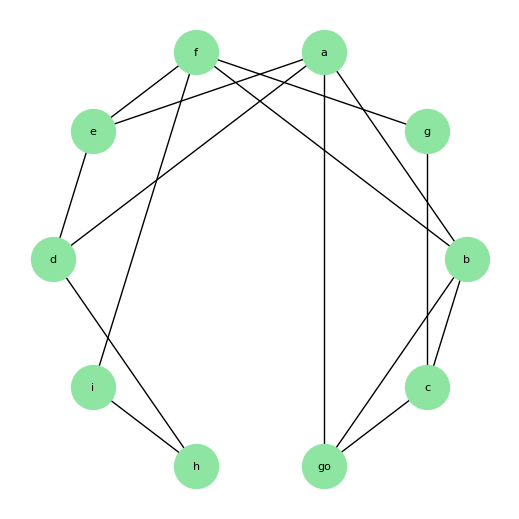

In [ ]:
# Graficar
from networkx.drawing.nx_pylab import circular_layout
colors = sns.color_palette('pastel', 5)
sns.set_palette(colors)

plt.figure(figsize=(5,5))
nodes_pos = nx.circular_layout(grafo_graph1)
nx.draw(
    grafo_graph1,
    pos = nodes_pos,
    node_color='C2',
    node_shape='o',
    node_size= 1000,
    font_size=8,
    with_labels=True
)

plt.show()

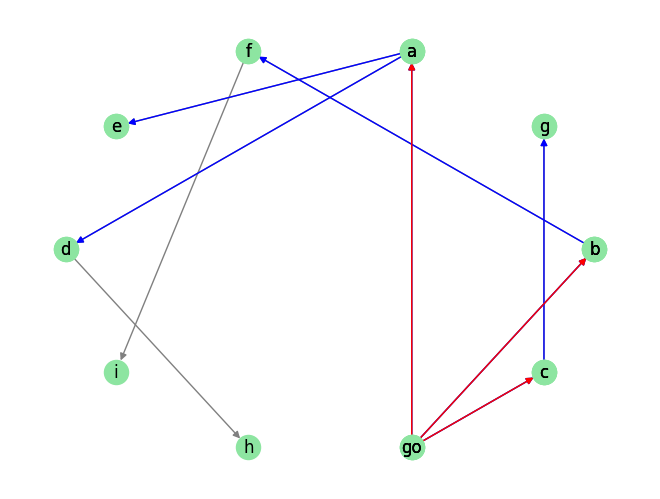

In [ ]:
bea1 = nx.bfs_tree(grafo_graph1, source='go', depth_limit=1)
bea2 = nx.bfs_tree(grafo_graph1, source='go', depth_limit=2)
bea3 = nx.bfs_tree(grafo_graph1, source='go', depth_limit=3)


nx.draw(bea3, nodes_pos, with_labels=True, node_color="C2", edge_color="gray")
nx.draw(bea2, nodes_pos, with_labels=True, node_color="C2", edge_color="blue")
nx.draw(bea1, nodes_pos, with_labels=True, node_color="C2", edge_color="red")

## 3) Ejercicio de práctica (Para aplicar BEP)

En el archivo [Graph2.txt](https://drive.google.com/file/d/1iaWPYLwN-gDkbon69RG-ZlttiVwTxEVV/view?usp=sharing) se tiene un listado con los nombres de nodos de un grafo, se tiene un par de nodos por línea representando las aristas. Lea el archivo para crear un **grafo dirigido**.

Aplique la **BEP** Al grafo obtenido iniciando desde el nodo `0` y grafique el resultado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/UNER/ColabNotebooks/GuiasDeClase/MaterialCapacitacionPython/Graph2.txt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nodes2=set()
edges2=[]
with open(file_path, 'r') as file2:
    for line in file2:
        nodes_aux2 = line.strip().split() #lista
        for node in nodes_aux2:
          nodes2.add(node)
        if len(nodes_aux2) == 2:
            edge2 = (nodes_aux2[0], nodes_aux2[1])
            edges2.append(edge2)
file2.close()

In [ ]:
# Creación del grafo
grafo_graph2 = nx.DiGraph()

In [ ]:
# Creación de nodos
grafo_graph2.add_nodes_from(nodes2)

In [ ]:
# Creación de aristas
grafo_graph2.add_edges_from(edges2)

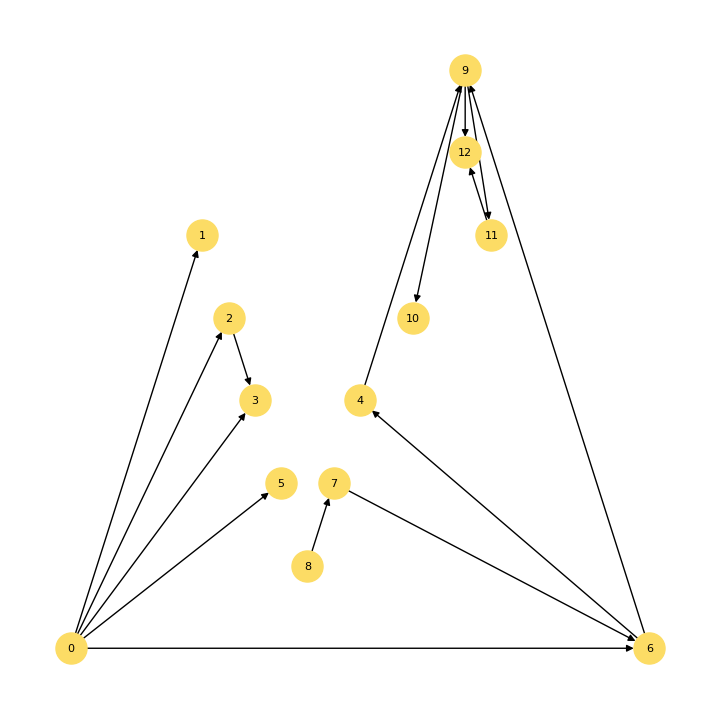

In [ ]:
plt.figure(figsize=(7,7))
nx.draw_planar(
    grafo_graph2,
    node_color='#fcdc65',
    node_shape='o',
    node_size= 500,
    font_size=8,
    with_labels=True
)

plt.show()

In [ ]:
bep = nx.dfs_tree(grafo_graph2, source='0')

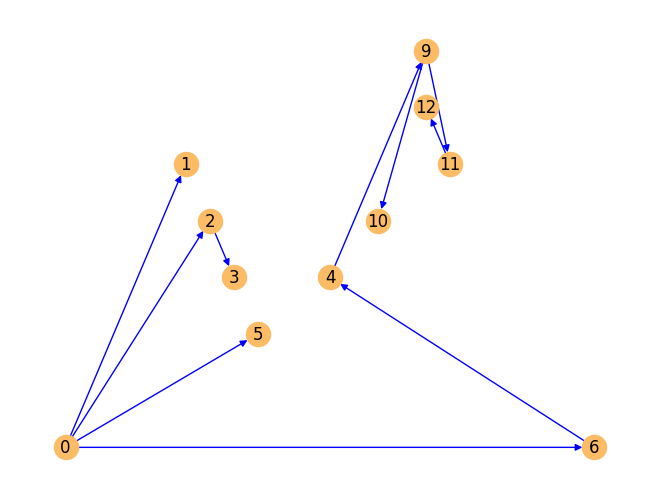

In [ ]:
nodes_pos2 = nx.planar_layout(grafo_graph2)
nx.draw(bep, nodes_pos2, with_labels=True, node_color="#fcbb65", edge_color="blue")

### 4) Ejercicio de práctica (Para aplicar CFC)

Escribir el código necesario para graficar el siguiente grafo con _NetworkX_:

<center><img src="https://drive.google.com/uc?export=view&id=1p0X6ZujB8tPy-FhWWzVCSn2ElwO8EPOV" width=450 alt="centered image"></center>

Una vez creado, encuentre sus **CFC**.


In [ ]:
# Creación del grafo clase
grafo4 = nx.DiGraph()

In [ ]:
# Creación de nodos
grafo4.add_nodes_from([('0', dict(pos=(1,5))), ('1', dict(pos=(0,4))), ('2', dict(pos=(2,4))), ('3', dict(pos=(1,3))), ('4', dict(pos=(3,3))), ('5', dict(pos=(3,5))), ('6', dict(pos=(4,4))), ('7', dict(pos=(1,2))),('8', dict(pos=(0,1))), ('9', dict(pos=(1,1))), ('10', dict(pos=(2,1))), ('11', dict(pos=(1,0))), ('12', dict(pos=(3,2))), ('13', dict(pos=(4,2))), ('14', dict(pos=(3,1))), ('15', dict(pos=(4,0)))])

In [ ]:
# Creación de aristas
grafo4.add_edges_from([('0', '1'), ('0', '5')])
grafo4.add_edges_from([('1', '2'), ('1', '3'), ('1', '8')])
grafo4.add_edges_from([('2','0')])
grafo4.add_edges_from([('3','2'), ('3','4'), ('3','7')])
grafo4.add_edges_from([('4','6')])
grafo4.add_edges_from([('5','4')])
grafo4.add_edges_from([('6','5')])
grafo4.add_edges_from([('7','8'),('7','10'), ('7','12')])
grafo4.add_edges_from([('8','11')])
grafo4.add_edges_from([('9','7')])
grafo4.add_edges_from([('10','11'),('10','14')])
grafo4.add_edges_from([('11','9'),('11','15')])
grafo4.add_edges_from([('12','13')])
grafo4.add_edges_from([('13','15')])
grafo4.add_edges_from([('14','12')])
grafo4.add_edges_from([('15','14')])

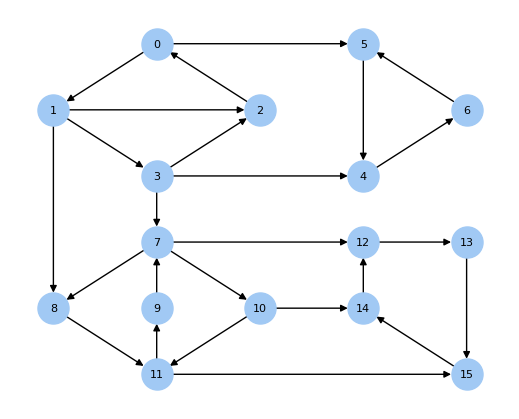

In [ ]:
# Gráfico
plt.figure(figsize=(5,4))
pos = nx.get_node_attributes(grafo4, 'pos')
nx.draw(
    grafo4,
    pos,
    node_color='#a1c9f4',
    node_shape='o',
    node_size= 500,
    font_size=8,
    with_labels=True,
)

plt.show()

In [ ]:
cfc = list(nx.strongly_connected_components(grafo4))
cantidad = nx.number_strongly_connected_components(grafo4)
print(f'La cantidad de componentes fuertemente conectados son: {cantidad}')
print('Los Componentes Fuertemente Conectados son:')
print(cfc)

La cantidad de componentes fuertemente conectados son: 4
Los Componentes Fuertemente Conectados son:
[{'4', '5', '6'}, {'13', '15', '12', '14'}, {'10', '7', '11', '8', '9'}, {'1', '0', '3', '2'}]
